# Analysis of Anscombe's Quarter Dataset
<div style="text-align: right"> Fundamentals of Data Analysis</div>
<div style="text-align: right"> Shane Healy, OCT-2018</div>


# Background

Who created

When

How

# Plotting Dataset

In [3]:
import pandas as pd

In [4]:
df_read = pd.read_csv("asc_data.csv")

In [5]:
df_read.style.highlight_null(null_color='red')

,Observation,x1,y1,Unnamed: 3,x2,y2,Unnamed: 6,x3,y3,Unnamed: 9,x4,y4
0,1,10,8.04,nan,10,9.14,nan,10,7.46,nan,8,6.58
1,2,8,6.95,nan,8,8.14,nan,8,6.77,nan,8,5.76
2,3,13,7.58,nan,13,8.74,nan,13,12.74,nan,8,7.71
3,4,9,8.81,nan,9,8.77,nan,9,7.11,nan,8,8.84
4,5,11,8.33,nan,11,9.26,nan,11,7.81,nan,8,8.47
5,6,14,9.96,nan,14,8.1,nan,14,8.84,nan,8,7.04
6,7,6,7.24,nan,6,6.13,nan,6,6.08,nan,8,5.25
7,8,4,4.26,nan,4,3.1,nan,4,5.39,nan,19,12.5
8,9,12,10.84,nan,12,9.13,nan,12,8.15,nan,8,5.56
9,10,7,4.82,nan,7,7.26,nan,7,6.42,nan,8,7.91


In [6]:
df = df_read.drop(columns=['Unnamed: 3', 'Unnamed: 6', 'Unnamed: 9', 'Observation'])
df

,x1,y1,x2,y2,x3,y3,x4,y4
0,10,8.04,10,9.14,10,7.46,8,6.58
1,8,6.95,8,8.14,8,6.77,8,5.76
2,13,7.58,13,8.74,13,12.74,8,7.71
3,9,8.81,9,8.77,9,7.11,8,8.84
4,11,8.33,11,9.26,11,7.81,8,8.47
5,14,9.96,14,8.10,14,8.84,8,7.04
6,6,7.24,6,6.13,6,6.08,8,5.25
7,4,4.26,4,3.10,4,5.39,19,12.50
8,12,10.84,12,9.13,12,8.15,8,5.56
9,7,4.82,7,7.26,7,6.42,8,7.91


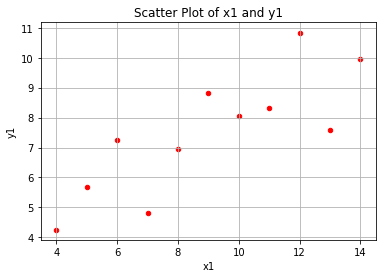

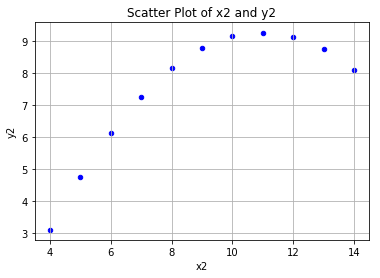

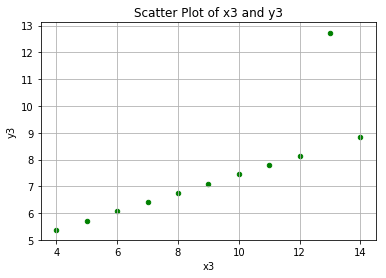

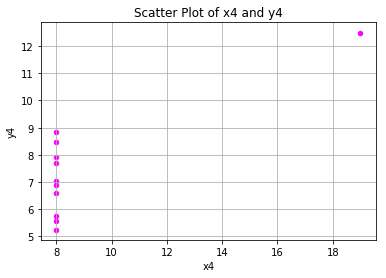

In [66]:
df.plot(kind='scatter',x='x1',y='y1',color='red', title="Scatter Plot of x1 and y1",grid=True)
df.plot(kind='scatter',x='x2',y='y2',color='blue', title="Scatter Plot of x2 and y2",grid=True)
df.plot(kind='scatter',x='x3',y='y3',color='green', title="Scatter Plot of x3 and y3",grid=True)
df.plot(kind='scatter',x='x4',y='y4',color='magenta', title="Scatter Plot of x4 and y4",grid=True)


# Descriptive Statistics

In [8]:
df.describe().style.set_properties(**{'text-align': 'right'})

,x1,y1,x2,y2,x3,y3,x4,y4
count,11,11,11,11,11,11,11,11
mean,9,7.50091,9,7.50091,9,7.5,9,7.50091
std,3.31662,2.03157,3.31662,2.03166,3.31662,2.03042,3.31662,2.03058
min,4,4.26,4,3.1,4,5.39,8,5.25
25%,6.5,6.315,6.5,6.695,6.5,6.25,8,6.17
50%,9,7.58,9,8.14,9,7.11,8,7.04
75%,11.5,8.57,11.5,8.95,11.5,7.98,8,8.19
max,14,10.84,14,9.26,14,12.74,19,12.5


In [18]:
df.loc[:,["x1"]]

,x1
0,10
1,8
2,13
3,9
4,11
5,14
6,6
7,4
8,12
9,7


In [10]:
import numpy as np
import matplotlib.pyplot as plt

In [12]:
# Write function for Simple Linear Regression

def slr(x,y):
# Calculate the means of x and y.
    x_avg = np.mean(x)
    y_avg = np.mean(y)

    x_zero = x - x_avg
    y_zero = y - y_avg

# The best m, slope fo line, is found by the following calculation.
    m = np.sum(x_zero * y_zero) / np.sum(x_zero * x_zero)

# Use m from above to calculate the best c, intercept.
    c = y_avg - m * x_avg

    return m,c


In [17]:
print("The m and c values for x1y1 are: ",slr(x1,y1))

The m and c values for x1y1 are:  (0.5000909090909091, 3.0000909090909103)


Therefore, the linear equation to describe the relationship between x1 and y1 is:

y1 = 0.5000909090909091(x1) + 3.0000909090909103

The numpy.polyfit function will calculate the linear equation to describe two sets of data.

In [42]:
# Create arrays to hold data values from dataframe by referencing labels
x1 = df["x1"].values
y1 = df["y1"].values
x2 = df["x2"].values
y2 = df["y2"].values
x3 = df["x3"].values
y3 = df["y3"].values
x4 = df["x4"].values
y4 = df["y4"].values

In [74]:
# First degree polynomial is linear
# Assigning array values to m, slope, and c, y intercept. 
m1,c1 = np.polyfit(x1,y1,1)
m2,c2 = np.polyfit(x2,y2,1)
m3,c3 = np.polyfit(x3,y3,1)
m4,c4 = np.polyfit(x4,y4,1)


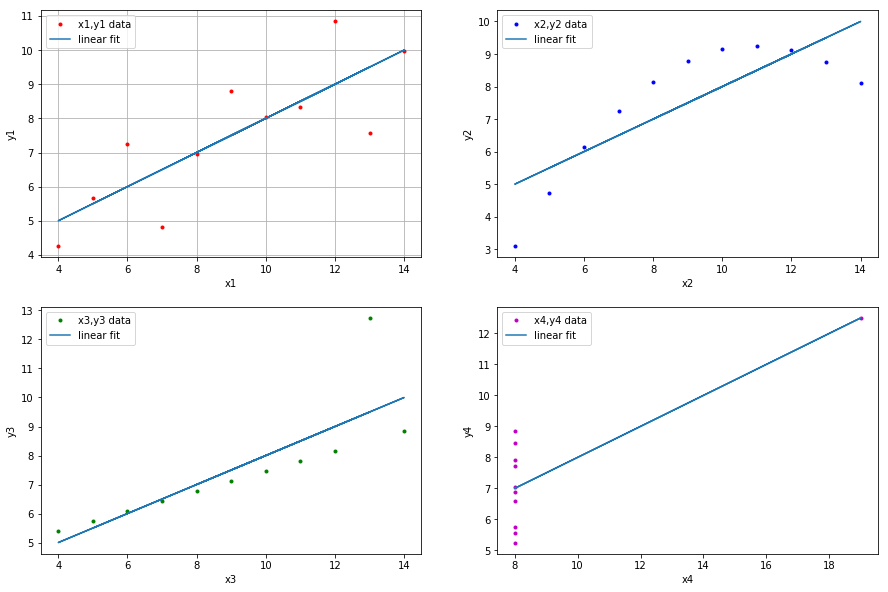

In [78]:
# Setting figure and defining size of subplots
fig = plt.figure(figsize=(15,10))

plt.subplot(2, 2, 1)
plt.plot(x1,y1,'r.',label='x1,y1 data')
plt.plot(x1,m1*x1+c1,label='linear fit')
plt.xlabel('x1')
plt.ylabel('y1')
plt.grid(True)
plt.legend()

plt.subplot(2, 2, 2)
plt.plot(x2,y2,'b.',label='x2,y2 data')
plt.plot(x2,m2*x2+c2,label='linear fit')
plt.xlabel('x2')
plt.ylabel('y2')
plt.grid(True)
plt.legend()

plt.subplot(2, 2, 3)
plt.plot(x3,y3,'g.',label='x3,y3 data')
plt.plot(x3,m3*x3+c3,label='linear fit')
plt.xlabel('x3')
plt.ylabel('y3')
plt.grid(True)
plt.legend()

plt.subplot(2, 2, 4)
plt.plot(x4,y4,'m.',label='x4,y4 data')
plt.plot(x4,m4*x4+c4,label='linear fit')
plt.xlabel('x4')
plt.ylabel('y4')
plt.grid(True)
plt.legend()

plt.show()


# Discussion of Anscombe's Quartet Datasets

## References
1. Anscombe quartet dataset http://www3.wabash.edu/econometrics/econometricsbook/Chapters/Ch05InterpretingRegression/ExcelFiles/Anscombe.xls

2. http://pandas.pydata.org/pandas-docs/stable/style.html
